In [1]:
import matplotlib.pyplot as plt
import matplotlib.table as tbl
import math
import numpy as np
import pandas as pd

import csv
import os

In [18]:
# Load data

# Expects all relevant files to be in this folder
folder = 'FDs_data/FDs_20Size_allOffsets'
files = [f for f in os.listdir(folder) if 'Lung' in f]

df_list = []
for f in files:
    df_dict = {}
    with open(os.path.join(folder, f), 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        csv_data = list(csv_reader)
    
    sc_arr = np.asarray(csv_data[4:]).astype(int)
    sizes, counts = sc_arr[:, 0], sc_arr[:, 1]
    
    df_dict = {
        'SID':                 '_'.join(f.split('_')[:-2]),
        'Lobe':                '',
        'Artery_Or_Vein':      '',
        'Fractal_Dimension':   float(csv_data[0][1]),
        'Coefficients':        np.array([csv_data[1][1], csv_data[2][1]]).astype(float),
        'Sizes':               sizes,
        'Counts':              counts,
    }
    
    f = f.lower()
    if 'left' in f:
        df_dict['Lobe'] = 'left'
    elif 'right' in f:
        df_dict['Lobe'] = 'right'
    elif 'whole' in f:
        df_dict['Lobe'] = 'whole'
    
    if 'artery' in f:
        df_dict['Artery_Or_Vein'] = 'artery'
    elif 'vein' in f:
        df_dict['Artery_Or_Vein'] = 'vein'
    
    df_list.append(df_dict)

df = pd.DataFrame(df_list)

# Generate Stats!
r_squared_list = []
residuals_list = []
pairwise_slopes_list = []
for index, row in df.iterrows():
    sizes_log = np.log(row['Sizes'])
    counts_log = np.log(row['Counts'])
    coeffs = row['Coefficients']
    
    # Calculate R Squared
    correlation_matrix = np.corrcoef(sizes_log, counts_log)
    r_squared = correlation_matrix[0, 1]**2
    r_squared_list.append(r_squared)
    
    # Calculate Residuals
    residuals = counts_log - np.polyval(coeffs, sizes_log)
    residuals_list.append(residuals)
    
    # Calculate Pairwise Slopes
    pairwise_slopes = (counts_log[1:] - counts_log[:-1]) / (sizes_log[1:] - sizes_log[:-1])
    pairwise_slopes_list.append(pairwise_slopes)

df['R_Squared'] = r_squared_list
df['Residuals'] = residuals_list
df['Pairwise_Slopes'] = pairwise_slopes_list

display(df)

,SID,Lobe,Artery_Or_Vein,Fractal_Dimension,Coefficients,Sizes,Counts,R_Squared,Residuals,Pairwise_Slopes
0,001_pect_phfirst_060413,whole,,2.355262,"[-2.3552624139978007, 14.918577614506201]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[2400, 3147, 4260, 6038, 8969, 14232, 24483, 4...",0.998611,"[-0.07961797186827191, -0.05678875358820612, -...","[-2.571939583215595, -2.570994545279383, -2.61..."
1,002_pect_phfirst_050913,whole,,2.279989,"[-2.2799893018228397, 14.5101734611689]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1991, 2610, 3517, 4920, 7202, 11244, 18919, 3...",0.998712,"[-0.08354362227619294, -0.05305127455803138, -...","[-2.5693989305417175, -2.5322673209694835, -2...."
2,004_pect_phfirst_082913,whole,,2.316289,"[-2.3162892690199874, 14.089640444932893]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1218, 1583, 2107, 2912, 4249, 6596, 11148, 21...",0.999597,"[-0.04569247857309211, -0.027626298758558043, ...","[-2.487759384762461, -2.427712550705341, -2.42..."
3,005_pect_phfirst_101912,whole,,2.422481,"[-2.422481228638867, 15.04805456777011]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[2272, 2990, 4048, 5700, 8549, 13642, 23953, 4...",0.999071,"[-0.06253358921689145, -0.0431545740939967, -0...","[-2.6064117551923975, -2.5720982898282987, -2...."
4,006_pect_phfirst_061312_10,whole,,2.275588,"[-2.2755884841862293, 15.355229778232802]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[4548, 5994, 8171, 11544, 17185, 27175, 46096,...",0.997116,"[-0.11573305995788274, -0.07941884307057379, -...","[-2.6202547632052635, -2.630534438015275, -2.5..."
...,...,...,...,...,...,...,...,...,...,...
221,384_pect_phfirst_102914,whole,,2.410954,"[-2.410953995042379, 15.14597090567884]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[2597, 3399, 4605, 6512, 9699, 15488, 26959, 5...",0.999084,"[-0.06128600101370907, -0.046181019125302925, ...","[-2.554318725122681, -2.578142066903286, -2.59..."
222,385_pect_phfirst_040317,whole,,2.310679,"[-2.3106786144078955, 13.787188101165711]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[877, 1142, 1534, 2157, 3201, 5100, 8897, 1741...",0.997251,"[-0.08850660980077762, -0.06793150229053246, -...","[-2.5059615188411466, -2.5054337415122685, -2...."
223,386_pect_phfirst_080817,whole,,2.248268,"[-2.2482682002856382, 14.396450383938314]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1883, 2475, 3358, 4740, 7051, 11137, 18938, 3...",0.996513,"[-0.12061924808032654, -0.08412379865387631, -...","[-2.594654597491348, -2.590399890225276, -2.58..."
224,387_pect_phfirst_090117,whole,,2.287457,"[-2.287456623605744, 14.421322437710272]","[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]","[1749, 2298, 3100, 4370, 6452, 10260, 17637, 3...",0.997368,"[-0.10191533100109851, -0.06992795701901056, -...","[-2.5910558778650055, -2.541647278797334, -2.5..."


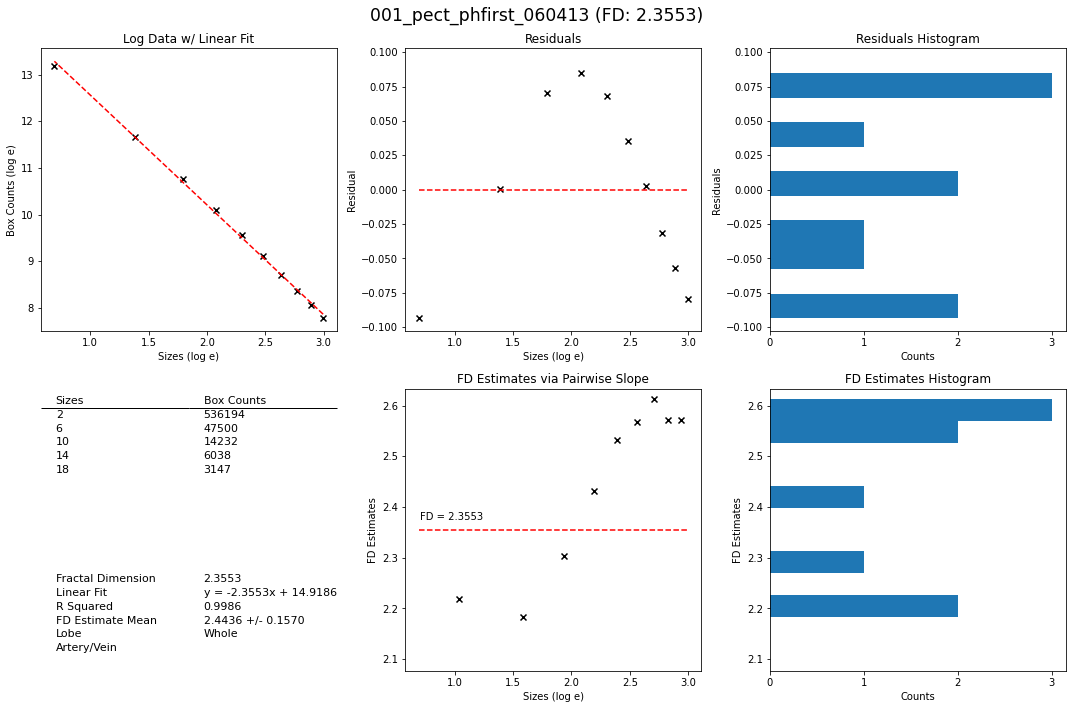

In [19]:
# Generate Figures!

# Create folders for each lobe
lobes = ['Left', 'Right', 'Whole']
lobes = ['Whole']
for lobe in lobes:
    os.makedirs(lobe, exist_ok=True)

for num in range(0, len(df)):
    # Grab all of the needed values from the dataframe
    sizes_log = np.log(df['Sizes'][num])
    sizes_log_half = (sizes_log[1:] + sizes_log[:-1]) / 2
    counts_log = np.log(df['Counts'][num])
    coeffs = df['Coefficients'][num]
    r_squared = df['R_Squared'][num]
    residuals = df['Residuals'][num]
    pairwise_slopes = df['Pairwise_Slopes'][num]
    fd = df['Fractal_Dimension'][num]
    sid = df['SID'][num]
    lobe = df['Lobe'][num]
    art_vein = df['Artery_Or_Vein'][num]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    plt.suptitle(f'{sid} (FD: {fd:.4f})', fontsize='xx-large')

    # Log Size vs Log Count w/ Linear Fit
    axes[0, 0].plot(sizes_log, np.polyval(coeffs, sizes_log), 'r--')
    axes[0, 0].scatter(sizes_log, counts_log, c='k', marker='x')
    axes[0, 0].set_title('Log Data w/ Linear Fit')
    axes[0, 0].set_xlabel('Sizes (log e)')
    axes[0, 0].set_ylabel('Box Counts (log e)')

    # Residuals w/ Mean Line
    axes[0, 1].hlines(0, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[0, 1].scatter(sizes_log, residuals, c='k', marker='x')
    axes[0, 1].set_title('Residuals')
    axes[0, 1].set_xlabel('Sizes (log e)')
    axes[0, 1].set_ylabel('Residual')
    yabs_max = abs(max(axes[0, 1].get_ylim(), key=abs))
    axes[0, 1].set_ylim(-yabs_max, yabs_max)

    # Residuals Hist
    axes[0, 2].hist(residuals, orientation='horizontal')
    axes[0, 2].set_title('Residuals Histogram')
    axes[0, 2].set_xlabel('Counts')
    axes[0, 2].set_ylabel('Residuals')
    axes[0, 2].set_ylim(-yabs_max, yabs_max)
    axes[0, 2].set_xticks([i for i in axes[0, 2].get_xticks() if not i % 1])

    # Pairwise_Slope w/ FD Line
    axes[1, 1].hlines(fd, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[1, 1].scatter(sizes_log_half, -pairwise_slopes, c='k', marker='x')
    axes[1, 1].set_title('FD Estimates via Pairwise Slope')
    axes[1, 1].set_xlabel('Sizes (log e)')
    axes[1, 1].set_ylabel('FD Estimates')
#     axes[1, 1].text(max(sizes_log)-4.1, fd+0.02, f'FD = {fd:.5}')
    axes[1, 1].text(0.7, fd+0.02, f'FD = {fd:.5}')
    yabs_max = abs(max(axes[1, 1].get_ylim()-fd, key=abs))
    axes[1, 1].set_ylim(fd-yabs_max, fd+yabs_max)

    # Pairwise_Slope Hist
    axes[1, 2].hist(-pairwise_slopes, orientation='horizontal')
    axes[1, 2].set_title('FD Estimates Histogram')
    axes[1, 2].set_xlabel('Counts')
    axes[1, 2].set_ylabel('FD Estimates')
    axes[1, 2].set_ylim(fd-yabs_max, fd+yabs_max)
    axes[1, 2].set_xticks([i for i in axes[1, 2].get_xticks() if not i % 1])

    # Data Table
    fd_estimate_mean = np.mean(-pairwise_slopes)
    fd_estimate_std = np.std(-pairwise_slopes)
    
#     # Table: Only display powers of 2 (ManySize)
#     ind = list(2**np.arange(np.log2(df['Sizes'][num][0]), dtype=int)-1)
#     sizes = df['Sizes'][num][::-1][ind]
#     boxes = df['Counts'][num][::-1][ind]
    
    # Table: Only display mutiples of 2
    sizes = df['Sizes'][num][::-2]
    boxes = df['Counts'][num][::-2]
    
    # Add to Table
    cells = [['Sizes', 'Box Counts']]
    for size, count in zip(sizes, boxes):
        cells.append([str(size), str(count)])
    for i in range(0, 12-len(sizes)):
        cells.append(['', ''])

    cells.append(['Fractal Dimension', f'{fd:.4f}'])
    cells.append(['Linear Fit', f'y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}'])
    cells.append(['R Squared', f'{r_squared:.4f}'])
    cells.append(['FD Estimate Mean', f'{fd_estimate_mean:.4f} +/- {fd_estimate_std:.4f}'])
    cells.append(['Lobe', f'{lobe.capitalize()}'])
    if art_vein:
        cells.append(['Artery/Vein', f'{art_vein.capitalize()}'])

    axes[1, 0].axis('tight')
    axes[1, 0].axis('off')
    table = axes[1, 0].table(cells, cellLoc='left', loc='upper center')

    # More Table Shenanigans
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    for c in table.get_celld().values():
        c.visible_edges = ''
    table[(0, 0)].visible_edges = 'B'
    table[(0, 1)].visible_edges = 'B'

    plt.tight_layout()
#     plt.savefig(f'{lobe.capitalize()}/{sid}_{lobe}LungVesselParticles_stats.png', facecolor=(1, 1, 1, 1), edgecolor='none')
    plt.savefig(f'{lobe.capitalize()}/{sid}_{lobe}LungVesselParticlesConnected{art_vein.capitalize()}_stats.png', facecolor=(1, 1, 1, 1), edgecolor='none')
    
#     if num > 1:
#         break
    
    # Close all figures except for the first to double check
    if num > 0:
        plt.close(fig)

In [10]:
ind = list(2**np.arange(np.log2(df['Sizes'][num][0]), dtype=int)-1)
sizes = df['Sizes'][num][::-1][ind]
boxes = df['Counts'][num][::-1][ind]

print(ind)
print(sizes)
print(boxes)

[0, 1, 3, 7, 15, 31, 63]
[ 2  3  5  9 17 33 65]
[178507  72913  25381   7901   1949    367     69]


In [13]:
df['Sizes'][num][::-1][ind]

array([ 2,  3,  5,  9, 17, 33, 65])

In [177]:
# Calculate the means / SD for pairwise slopes @ FD < 2 and FD > 3 for each lobe
keys = ['left', 'right', 'whole']
upper = {key: [] for key in keys}
lower = {key: [] for key in keys}

for num in range(0, len(df)):
    lobe = df['Lobe'][num]
    
    # FD > 3 and FD < 2
    upper[lobe].append(df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] > 3)])
    lower[lobe].append(df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] < 2)])

for key in keys:
    

In [184]:
display([f'{key} Mean: {np.mean(upper[key])} +/- {np.std(upper[key])}' for key in keys])
display([f'{key} Mean: {np.mean(lower[key])} +/- {np.std(lower[key])}' for key in keys])

['left Mean: 40.54222222222222 +/- 8.774166345683698',
 'right Mean: 40.60444444444445 +/- 8.37928545231382',
 'whole Mean: 47.10619469026549 +/- 8.950070778242317']

['left Mean: 33.093333333333334 +/- 6.176313175709636',
 'right Mean: 35.26222222222222 +/- 6.26295240597485',
 'whole Mean: 36.610619469026545 +/- 6.686313624243545']

In [6]:
# Find linear fits for the points near when residuals are 0

# cells = [['SID', 'Lobe', 'Artery_Or_Vein', 'Fractal_Dimension', 'Linear_Fit', 'R_Squared', 'FD_@_1st_Root', 'FD_@_2nd_Root', 'FD_@_Positive_Residuals']]
cells = [['SID', 'Lobe', 'Artery_Or_Vein', 'Fractal_Dimension', 'Linear_Fit', 'R_Squared']]
for num in range(0, len(df)):
    # Grab all of the needed values from the dataframe
    sizes_log = np.log(df['Sizes'][num])
    sizes_log_half = (sizes_log[1:] + sizes_log[:-1]) / 2
    counts_log = np.log(df['Counts'][num])
    coeffs = df['Coefficients'][num]
    r_squared = df['R_Squared'][num]
    residuals = df['Residuals'][num]
    pairwise_slopes = df['Pairwise_Slopes'][num]
    fd = df['Fractal_Dimension'][num]
    sid = df['SID'][num]
    lobe = df['Lobe'][num]
    art_vein = df['Artery_Or_Vein'][num]

#     zero_crossings = np.where(np.diff(np.sign(np.array(residuals))))[0]
#     if len(zero_crossings) > 2:
#         display(f'{sid}_{lobe}')
#         continue
    
#     # Fits
#     residuals_poly = []
#     counts_poly = []
#     for i, c in enumerate(zero_crossings):
#         residuals_poly.append(np.polynomial.polynomial.Polynomial.fit(x=sizes_log[c-1:c+3], y=residuals[c-1:c+3], deg=1, domain=[]))
#         counts_poly.append(np.polynomial.polynomial.Polynomial.fit(x=sizes_log[c-1:c+3], y=counts_log[c-1:c+3], deg=1, domain=[]))
    
#     counts_with_pos_residuals_poly = np.polynomial.polynomial.Polynomial.fit(x=sizes_log[residuals > 0], y=counts_log[residuals > 0], deg=1, domain=[])
    
    # See initialization of cells variable for labels
#     cells.append([
#         f'{sid}',
#         f'{lobe}',
#         f'{art_vein}',
#         f'{fd:.4f}',
#         f'y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}',
#         f'{r_squared}',
#         f'{-counts_poly[0].coef[1]:.4f}',
#         f'{-counts_poly[1].coef[1]:.4f}',
#         f'{-counts_with_pos_residuals_poly.coef[1]:.4f}',
#     ])

    cells.append([
        f'{sid}',
        f'{lobe}',
        f'{art_vein}',
        f'{fd:.4f}',
        f'y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}',
        f'{r_squared}',
    ])
    
f = open(f'FDs_20SizeBy1_ArtVein_combined.csv', 'w')
writer = csv.writer(f, delimiter=',', lineterminator='\n')
for x in cells:
    writer.writerow(x)

f.close()

'016_pect_phfirst_022713_left'

'078_pect_phfirst_061113_left'

'078_pect_phfirst_061113_whole'

'081_pect_phfirst_031213_left'

'081_pect_phfirst_031213_whole'

'093_pect_phfrist_111612_left'

'117_pect_phfirst_021414_left'

'117_pect_phfirst_021414_whole'

'119_pect_phfirst_102414_right'

'119_pect_phfirst_102414_whole'

'135_pect_phfirst_102413_left'

'141_pect_phfirst_080115_left'

'150_pect_phfirst_111512_left'

'175_pect_phfirst_093015_left'

'186_pect_phfirst_031014_whole'

'190_pect_phfirst_110514_right'

'238_pect_phfirst_081616_whole'

'300_pect_phfirst_091415_left'

'320_pect_phfirst_120817_left'

'325_pect_phfirst_020818_whole'

'338_pect_phfirst_051517_left'

'338_pect_phfirst_051517_right'

'338_pect_phfirst_051517_whole'

'342_pect_phfirst_011618_right'

'344_pect_phfirst_041118_right'

'348_pect_phfirst_061218_left'

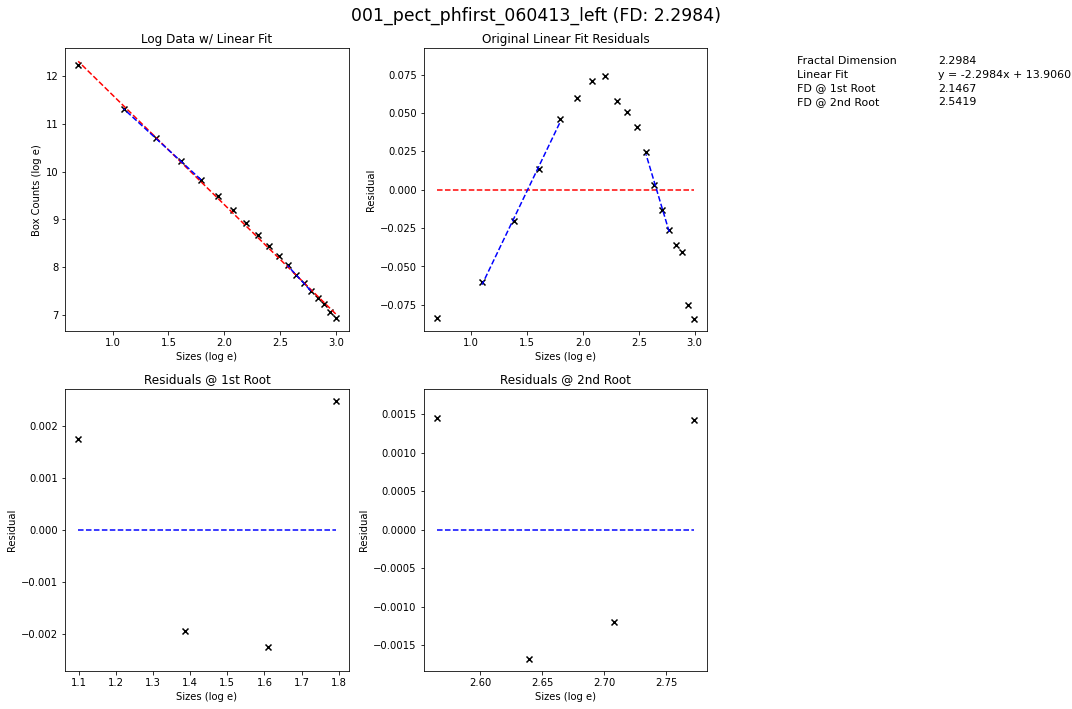

In [24]:
# Find linear fits for the points near when residuals are 0

# Create folders for each lobe
lobes = ['Left', 'Right', 'Whole']
for lobe in lobes:
    os.makedirs(lobe, exist_ok=True)

for num in range(0, len(df)):
    # Grab all of the needed values from the dataframe
    sizes_log = np.log(df['Sizes'][num])
    sizes_log_half = (sizes_log[1:] + sizes_log[:-1]) / 2
    counts_log = np.log(df['Counts'][num])
    coeffs = df['Coefficients'][num]
    r_squared = df['R_Squared'][num]
    residuals = df['Residuals'][num]
    pairwise_slopes = df['Pairwise_Slopes'][num]
    fd = df['Fractal_Dimension'][num]
    sid = df['SID'][num]
    lobe = df['Lobe'][num]

    zero_crossings = np.where(np.diff(np.sign(np.array(residuals))))[0]
    if len(zero_crossings) > 2:
        display(f'{sid}_{lobe}')
        continue
    zero_crossings = zero_crossings[::-1]
    
    # Fits
    residuals_poly = []
    counts_poly = []
    for i, c in enumerate(zero_crossings):
        residuals_poly.append(np.polynomial.polynomial.Polynomial.fit(x=sizes_log[c-1:c+3], y=residuals[c-1:c+3], deg=1, domain=[]))
        counts_poly.append(np.polynomial.polynomial.Polynomial.fit(x=sizes_log[c-1:c+3], y=counts_log[c-1:c+3], deg=1, domain=[]))

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    plt.suptitle(f'{sid}_{lobe} (FD: {fd:.4f})', fontsize='xx-large')
    
    # Log Size vs Log Count w/ Poly Fit
    axes[0, 0].plot(sizes_log, np.polyval(coeffs, sizes_log), 'r--')
    axes[0, 0].scatter(sizes_log, counts_log, c='k', marker='x')
    for i, c in enumerate(zero_crossings):
        poly = counts_poly[i]
        axes[0, 0].plot(sizes_log[c-1:c+3], poly(sizes_log[c-1:c+3]), 'b--')
    axes[0, 0].set_title('Log Data w/ Linear Fit')
    axes[0, 0].set_xlabel('Sizes (log e)')
    axes[0, 0].set_ylabel('Box Counts (log e)')

    # Residuals w/ Mean Line
    axes[0, 1].hlines(0, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[0, 1].scatter(sizes_log, residuals, c='k', marker='x')
    for i, c in enumerate(zero_crossings):
        poly = residuals_poly[i]
        axes[0, 1].plot(sizes_log[c-1:c+3], poly(sizes_log[c-1:c+3]), 'b--')
    axes[0, 1].set_title('Original Linear Fit Residuals')
    axes[0, 1].set_xlabel('Sizes (log e)')
    axes[0, 1].set_ylabel('Residual')
    yabs_max = abs(max(axes[0, 1].get_ylim(), key=abs))
    axes[0, 1].set_ylim(-yabs_max, yabs_max)
    
    # Residuals from Fit @ 1st and 2nd Roots
    for i, c in enumerate(zero_crossings):
        poly = counts_poly[i]
        residuals = counts_log[c-1:c+3]-poly(sizes_log[c-1:c+3])
        axes[1, i].hlines(0, min(sizes_log[c-1:c+3]), max(sizes_log[c-1:c+3]), colors='b', linestyles='dashed')
        axes[1, i].scatter(sizes_log[c-1:c+3], residuals, c='k', marker='x')
        if i:
            title = 'Residuals @ 2nd Root'
        else:
            title = 'Residuals @ 1st Root'
        axes[1, i].set_title(title)
        axes[1, i].set_xlabel('Sizes (log e)')
        axes[1, i].set_ylabel('Residual')
        yabs_max = abs(max(axes[1, i].get_ylim(), key=abs))
        axes[1, i].set_ylim(-yabs_max, yabs_max)
    
    # Remove last graph
    axes[1, 2].axis('tight')
    axes[1, 2].axis('off')
    
    # Add to Table
    cells = []
    cells.append(['Fractal Dimension', f'{fd:.4f}'])
    cells.append(['Linear Fit', f'y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}'])
    cells.append(['FD @ 1st Root', f'{-counts_poly[0].coef[1]:.4f}'])
    cells.append(['FD @ 2nd Root', f'{-counts_poly[1].coef[1]:.4f}'])
    
    axes[0, 2].axis('tight')
    axes[0, 2].axis('off')
    table = axes[0, 2].table(cells, cellLoc='left', loc='upper center')

    # More Table Shenanigans
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    for c in table.get_celld().values():
        c.visible_edges = ''
#     table[(0, 0)].visible_edges = 'B'
#     table[(0, 1)].visible_edges = 'B'

    plt.tight_layout()
    plt.savefig(f'{lobe.capitalize()}/{sid}_{lobe}LungVesselParticles_stats.png', facecolor=(1, 1, 1, 1), edgecolor='none')
    
#     if num > 1:
#         break
    
    # Close all figures except for the first to double check
    if num > 0:
        plt.close(fig)